# League of Legends рейтинг ойындарына талдау

__League of Legends__ - бес чемпионнан (ойын ішіндегі кейіпкерлер атауы) тұратын екі команда жау базасын жою үшін бір-бірімен соғысатын стратегиялық бірлескен MOBA жанрындағы ойын. 

Ойынның басты мақсаты: өзге команданың нексусын жою. 

Сіздің нексус - миниондар пайда болатын жер. Нексустың артында денсаулық пен мананы тез қалпына келтіруге, сондай-ақ дүкеннен заттарды сатып алуға болатын субұрқақ бар.

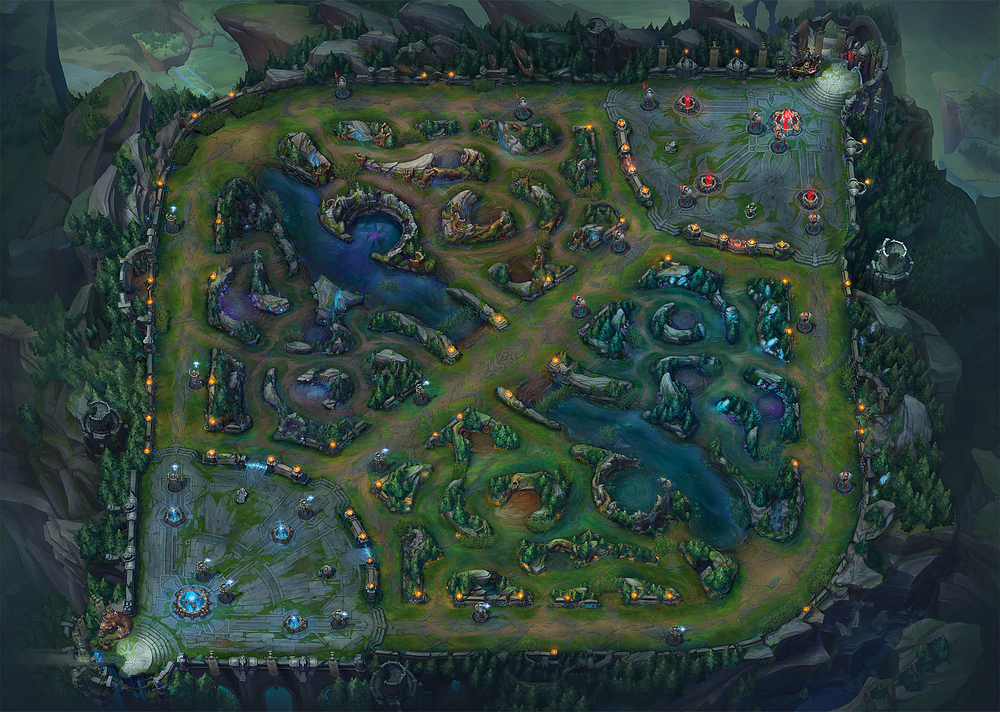

Қарсылас нексусқа жету үшін сіздің командаңыз кем дегенде бір жолақты босатуы керек. Бірақ мұны істеу оңай емес, өйткені жолды қорғаныс құрылымдары - мұнаралар мен ингибиторлар жауып тастайды. Әрбір жолдың үш мұнарасы және бір ингибиторы бар, ал нексус тағы екі мұнарамен қорғалады.

Жолақтар арасында бейтарап құбыжықтар өмір сүретін және өсімдіктер гүлдейтін орман бар. Ойынның ең маңызды құбыжықтары - барон Нашор және айдаһарлар. Бұл жауынгерлерді өлтіру сіздің командаңызға ойынның ағымын өзгерте алатын бірегей басымдылықтарды береді.

[Қалай ойнау керек?](https://www.leagueoflegends.com/ru-ru/how-to-play/)

Ойынның нәтижесін матчтың алғашқы 10 минутында анықтауға болатынын не болмайтынын білу үшін рейтингі жоғары (Diamond-Master)   матчтардың деректерін қарастырамыз.

[Деректерге қол жеткізу.](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min)

Датасет туралы айта кететін болсақ, әр топқа 20 ерекше параметрлерден келеді.

Анализ бастамай тұрып, сізге білу керек деректер бойынша глоссарий:

- Warding totem (Vision, қысқаша тотем немесе вард) - Ойыншы картада жақын маңдағы аумақты көруге мүмкіншілік алу үшін қоя алатын зат. Карта я болмаса құбыжықтарды бақылау мақсатында өте пайдалы.
- Minions (миниондар, криптер, фарм) - екі командаға тиесілі NPC. Ойыншылар оларды өлтірген кезде алтын алады.
- Jungle minions (қысқаша жай ғана орман) - ешбір топқа жатпайтын NPC. Ойыншылар оларды өлтірген кезде алтын мен қосымша пайдалы эффекттер (бафф) алады.
- Elite Monsters (ерекше құбыжықтар): команда өлтірген кезде үлкен бонус (алтын/XP(тәжірибе)/стат(кейіпкер параметрлеріне қосымша)) беретін зор денсаулығы/зақымы бар құбыжықтар.
- Dragons (айдаһарлар): өлтірілген кезде командаға бонус беретін және карта ландшафтын өзгертетін ерекше құбыжық. Белгілі бір команда өлтірген 4-ші айдаһар түріне байланысты статистикалық бонус береді. 5-ші айдаһар (аға айдаһар) командаға зор артықшылық береді.
- Herald (Геральд): Ойыншы өлтірген кезде статистикалық бонус беретін ерекше құбыжық. Бұл жолақта жауға қысым көрсетуге көмектеседі және құрылымдарды бұзады.

Қарастырылған деректер бойынша, кейіпкерлер мен олардың жинаған артефакттары саналмайды, бірақ олардың ойынға ықпалы жоқ болғанынан емес - ақпараттың толық болмағанынан. Бұл талдауда біз жалпы макро-ойын туралы және жалпы ойын барысында ойыншы неге назар аудару керегін көреміз.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import pi
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5           5            5                  0   
2                  0          7          11            4                  1   
3                  0          4           5            5                  1   
4                  0          6           6            6                  0   
...              ...        ...         ...          ...                ...   
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               1  ...                   0         17285          6.8   
3               0  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            1  ...                   0         15246          6.8   
9875            1  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            1  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  
...           ..

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

In [6]:
df['redWins'] = 1 - df['blueWins']

In [7]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redWins'],
      dtype='object')

In [8]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)

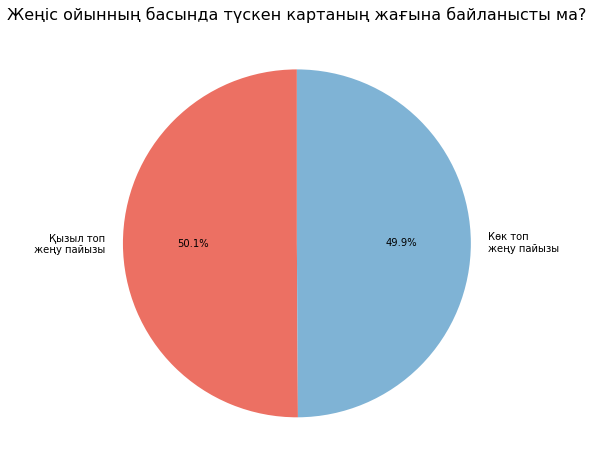

In [9]:
blue_wins_counts = df['blueWins'].value_counts()

labels = ['Қызыл топ\n жеңу пайызы', 'Көк топ\nжеңу пайызы']
colors = ['#EC7063', '#7FB3D5']

plt.figure(figsize=(8, 8))
plt.pie(blue_wins_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Жеңіс ойынның басында түскен картаның жағына байланысты ма?', fontsize = 16)
# plt.savefig('correlation_heatmap.png')
plt.show()

График көрсетіп тұрғандай, әр команданың жеңіске жету мүмкіндіктері тең, алайда команданың картаның қай жартысына түсуі де геймплейге біраз әсері бар. Мұны келесі статистикадан көруге болады:

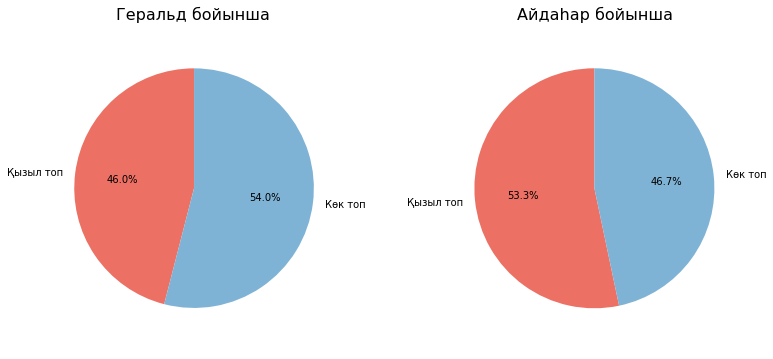

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.5) 

labels = ['Қызыл топ', 'Көк топ']
sizes = [df['redHeralds'].sum(), df['blueHeralds'].sum()]

plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Геральд бойынша', fontsize = 16)

sizes = [df['redDragons'].sum(), df['blueDragons'].sum()]

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Айдаһар бойынша',fontsize = 16)
# plt.savefig('correlation_heatmap.png')
plt.show()

Қызыл командамен салыстырғанда, көк команда Геральд (Rift Herald) және Барон Нашорға (Baron) оңай қол жеткізе алады. Сіз орман арқылы Барон шұңқырына тікелей бара аласыз, ал қызыл жағы құбыжықтың артындағы қабырғаны айналып өтуі керек. Егер де командалық күрес болса, көк топта біраз басымдылық бар, өйткені оларға вард орналастыру, жауларды көру, оларға қарсы тұру үшін география тарапынан ыңғайлырақ. Алайда айдаһарларға келгенде - басымдылық қызыл топқа өтеді, себебі шұңқыр картаның үстіңгі жағына қарайды. Ерекше құбыжықтар көбіне ойынның басында жақсы қосымша эффекттермен қамтамасыз етеді, сонымен қоса, жолақты дұрыс басқарғанда алтыннан, тәжірибеден артықшылыққа шығып, жауға қысым көрсетуге болады.

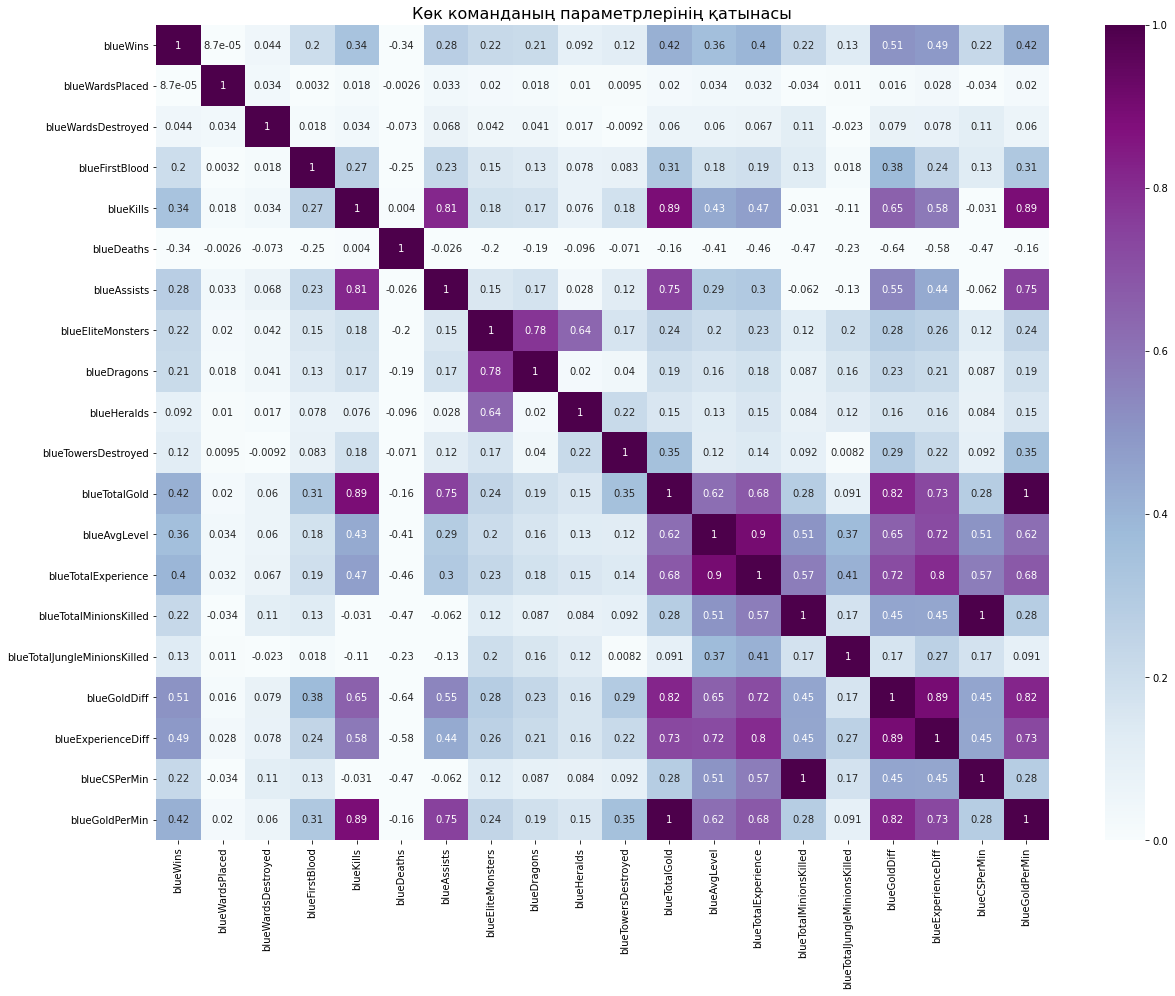

In [11]:
blue = df.iloc[:, :20].copy()

plt.figure(figsize=(20,15))
sns.heatmap(blue.corr(numeric_only = True), annot=True, vmin=0, cmap = 'BuPu')
plt.title('Көк команданың параметрлерінің қатынасы', fontsize = 16)
# plt.savefig('correlation_heatmap.png')
plt.show()

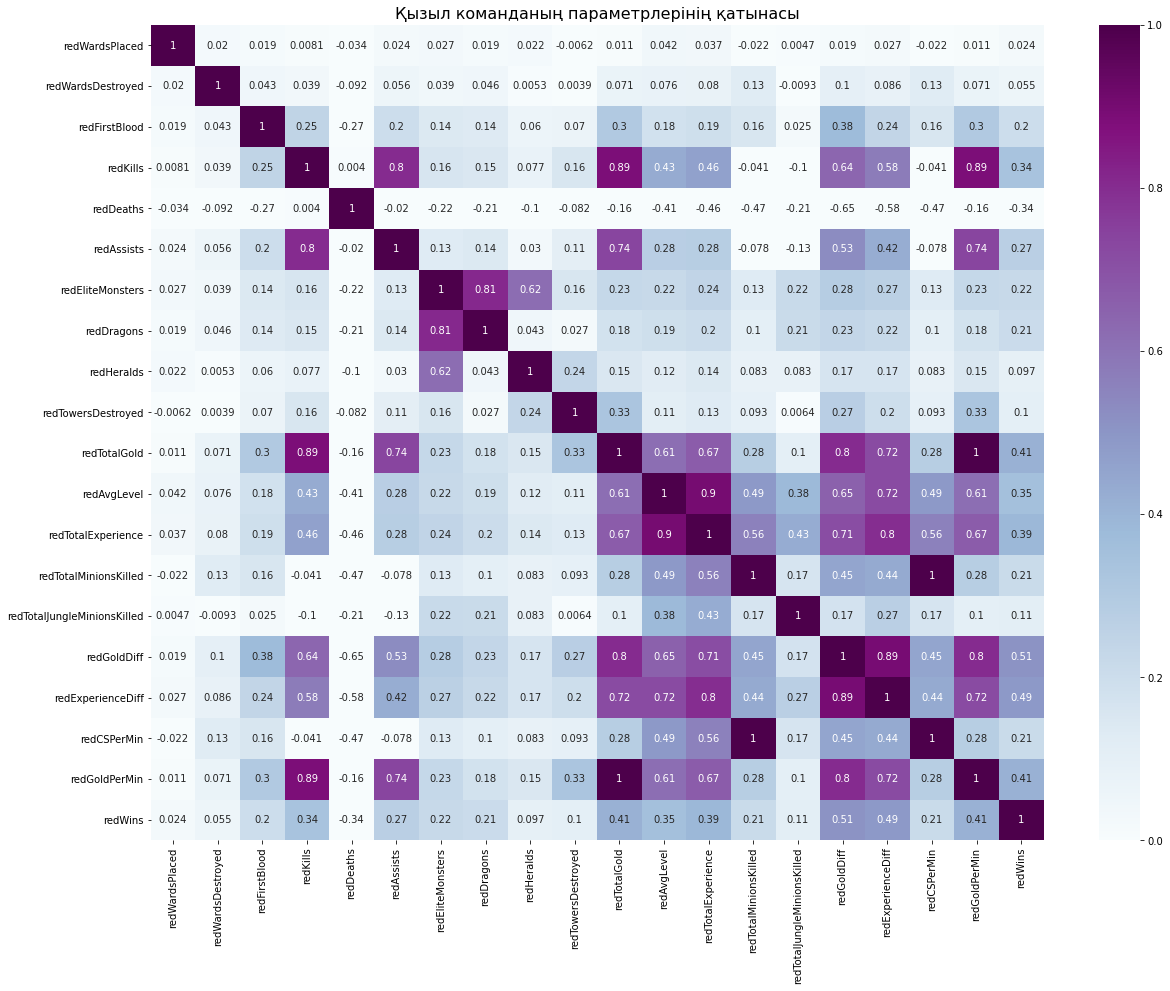

In [12]:
red = df.iloc[:, 20:].copy()

plt.figure(figsize=(20,15))
sns.heatmap(red.corr(numeric_only = True), annot=True, vmin=0, cmap = 'BuPu')
plt.title('Қызыл команданың параметрлерінің қатынасы', fontsize = 16)
# plt.savefig('correlation_heatmap.png')
plt.show()

Бұл кесте бойынша белгілі параметрлердің бір-бірінен тәуелділік арақатынасын көруге болады. Сандар неғұрлым үлкен болса, соғұрлым параметрлердің байланысы мықты. 

__Бұл графиктен қандай ой-пікір туындайды?__

- Өлтіру мен өлім жеңіс пен жеңілістің негізгі себебі болып табылады, бұл алтын, тәжірибе мен орташа деңгейдегі айырмашылықтарға байланысты. Әр өлтірім үшін 125–1000+ алтынға дейін (жау қаншалықты көп өлтірсе, оның басына соншалықты көп алтын беріледі), тәжірибеден 90+50*чемпион деңгейі формуласы бойынша мөлшерде беріледі.
- Сондай-ақ, қарсыласыңызды өлтіру оның cs/тәжірибесін жоққа шығарады, себебі оның жаңғыру мен одақтас мұнараға дейінгі жолы уақытында жау миниондар ағымын өз пайдасына өткізеді, бірақ ол орманшы/роуминг қысымына тап болуы мүмкін.
- Өлтірудің құны (шамамен) 17 cs  фармға тең, сондықтан егер сіз қарсыласыңыздан 35–50 cs-ға жоғары болсаңыз, сіз олардан 2–3 киллге жоғарысыз.
- Сонымен қатар ойын нәтижесіне ерекше құбыжықтар арқылы ерте басымдылыққа қол жеткізу де әсер етеді. Мысалы, бірінші құлаған мұнара үшін алтын беріледі, 14 минутқа дейін мұнарада 5 пластина болады, әрқайсысын бұзғанда тағы қосымша алтын алу мүмкіндігі бар, Геральд бір соққыдан 2 пластинаны түсіреді.
- Кейде сізде сәтсіз жолақ болуы мүмкін, мысалға қарсыласыңыз сізді бірнеше рет өлтірді немесе сізді қарсылас орманшы қадағалап жүр, бірақ егер сіз фарм жинап жүрсеңіз, ойында әлі қауіп төндіретін чемпион болуыңыз әбден мүмкін. Фарм мен өлтірулер маңызы жағынан бір дәрежеде.

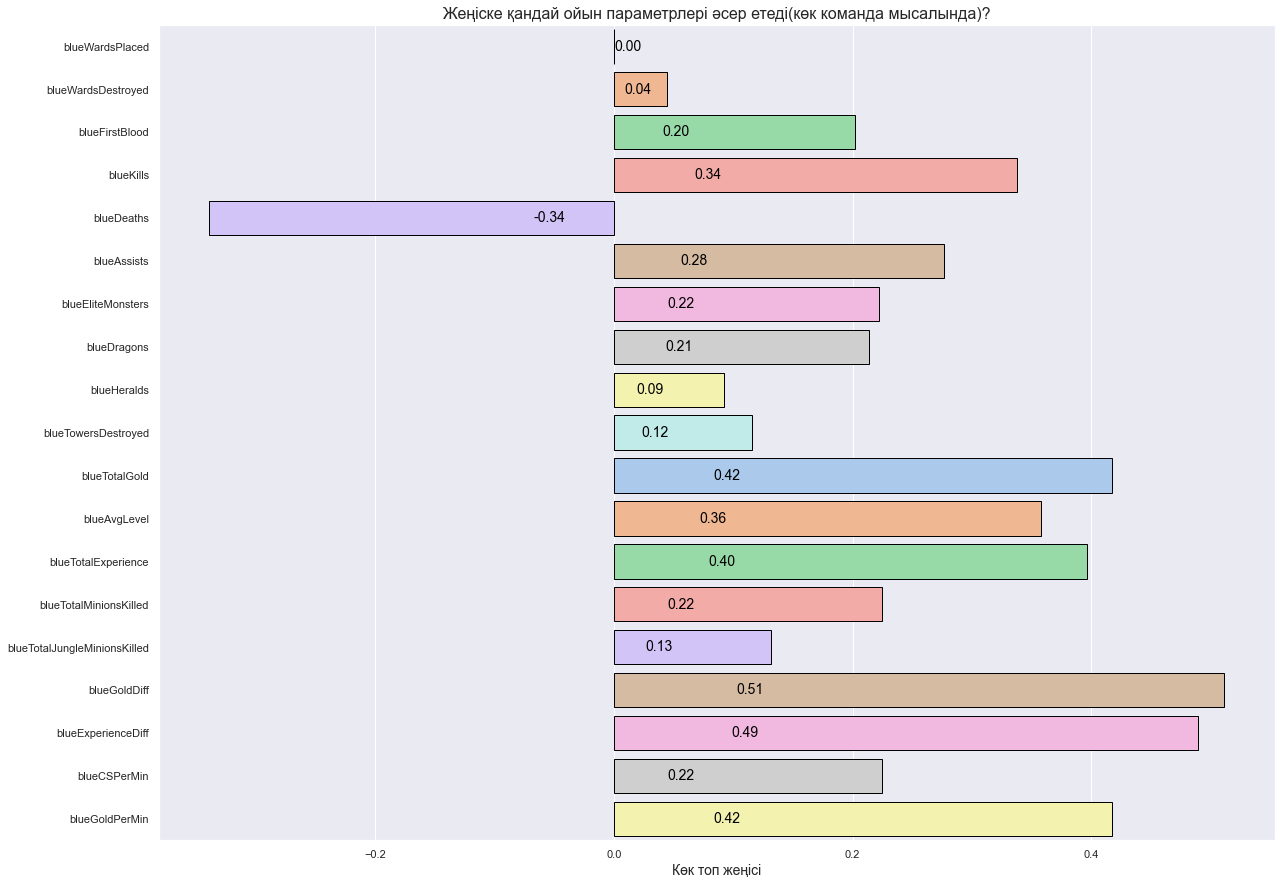

In [24]:
bcorr = blue.corr()["blueWins"].drop(['blueWins'])

sns.set_style("darkgrid")
plt.figure(figsize=(20, 15))
bar_plot = sns.barplot(x = bcorr, y = bcorr.index, palette = 'pastel', ec = 'black')

for index, value in enumerate(bcorr.values):
    bar_plot.text(value/5, index, f'{value:.2f}', ha='left', va='center', fontsize=14, color='black')

plt.title('Жеңіске қандай ойын параметрлері әсер етеді(көк команда мысалында)?', fontsize=16)
plt.xlabel('Көк топ жеңісі', fontsize=14)
plt.ylabel('')
# plt.savefig('correlation_heatmap.png')
plt.show()

__Біз параметрлердің бір-біріне байланыс қарастырдық, ал енді жеңіске жету үшін не маңызды?__ 
- Алғашқы қантөгіс ойынның сәтті өтуіне 20% әсер етеді, ол өлтірген жауға 400 алтын және оған көмек бергендерге 50+ алтын береді. Бұл алтынға жау керекті қару-жарақты  алып, ойын басталмай тұрып-ақ мықты басымдылыққа ие болады. 
- Өлтіру мен өлім бір-біріне қарама-қарсы тең келетін ұғымдар, қанша өлтірсеңіз - сонша шамаға артықшылыққа шығасыз, қанша өлсеңіз - соншалықты жеңуге шамаңыз азаяды.
- Өлтіру көп болса, көмек те көп болады, әр көмек үшін әр көмекші чемпион да қосымша алтын мен XP алады.
- Ерте ойын кезінде көбіне топтар объектілерді (ерекше құбыжықтарды) алуға қатты ұмтылмайды, статистика бойынша тек қана 1/5 жағдайларда контест өтеді. Неліктен? Бұл объекттерді алу көбінесе cs, мұнаралар немесе миниондар ағымы сияқты басқа мағызды нәрселерді құрбан етумен байланысты, бұл фактор ұзақ уақыт арасында теңестіріледі, сондықтан алғашқы ерекше құбыжықтарды он минутқа дейін алу күмәнді ой ретінде көрінеді. Әсіресе оларды ерте алу қауіпті болып саналады, олардың зақымы мен денсаулығы біраз қиындықтар туғызатыны барлығына белгілі.
- Ойыншылар көбіне Геральдты емес, айдаһарлардың құндылығы жоғары деп санайды. Айдаһарлар ойын барысында қуат артуына нақты кепілдік береді, ал Геральд - ешқандай кепілдік бермейді, оның жақсы реализациясы одақтас және жау орманшыларға, жолақтағы жағдайға, мұнара пластиналарына, миниондар ағымына байланысты. Иә, әрине Геральд дұрыс қолда өте қауіпті юнит, тіпті ингибтерді оңай бір соққымен құлататын қару, бірақ көптеген ойындарда ылғи солай бола бермейді. Егер сіздің командаңыз Геральдпен жолақты қысу үшін топтаса алмаса, сіз агрессивті күйде бірінің артынан бірі мұнараларды құлатуыңыз екіталай. Сонымен қатар, айдаһарлардың әр түрі өзінің пайдасын береді, мұның арқасында айдаһар сіздің командаңызға керек-керек емес екендігін матчапқа қарай бағалайды.
- Орманшының өлтірген миниондар саны екіұшты параметр. Бұл агрессивті зақымы бар орманшы болса, маңызы бар (скейл үшін фарм болу қажет), алайда ойында көбіне саппорт рөлінде ойналатын орманшылар да бар, оларға миниондардың үлкен саны керек емес, олардың геймплейі жолақтағы одақтастарына cs-ті жауға қысым көрсету арқылы теңестіру, жауларды әлсірететін эффект беру, командаға пайдалы қабілеттерімен көмектесу, зақымды өзіне сіңіру, командалық төбелес бастау, сондықтан бір жеке чемпионның cs параметріне қарағанда ойынға аз әсер ететінін растауға болады.
- Мұнараларға келгенде, алғашқы 10 минуттық статистика болған соң корреляциясы аз көрінеді, бірақ ойын барысында мұнаралардың бар-болмауы ойын ағымына әсері сезіледі. Жаулар жолақты басқанда, мұнаралардың зақымы зор, егер де жау чемпион одақтас мұнара астында қарсыласына зақым түсірсе, мұнара жауға шабуылдайды.

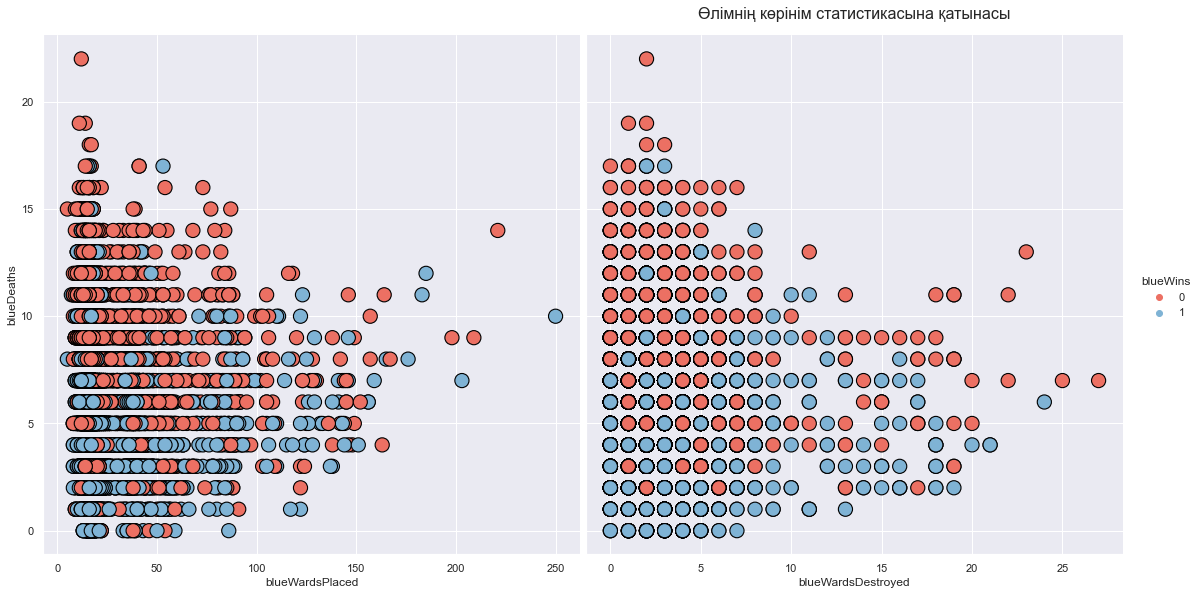

In [31]:
sns.pairplot(
    blue[['blueWardsPlaced', 'blueWardsDestroyed', 'blueDeaths', 'blueWins']],
    x_vars=['blueWardsPlaced', 'blueWardsDestroyed'],
    y_vars=['blueDeaths'],
    hue='blueWins',
    palette={0: '#EC7063', 1: '#7FB3D5'},
    height=8,
    plot_kws={'edgecolor': 'black', 's': 200})

plt.title('Өлімнің көрінім статистикасына қатынасы', y=1.02, fontsize=16)
# plt.savefig('correlation_heatmap.png')
plt.show()

Вардтарды жою одақтас орманшының сіздің жолақтағы жауларды қолға түсіру мүмкіндігін арттырады, олар миниондар ағымын сізге қарай басса, өзіне қауіпті аймақта, орманшы туралы еш ақпаратсыз жүрген жағдайда өлу шамасы үлкен. Үстідегі график идеясына келетін болсақ, қаншалықты көп вард қойылса және жаудың вардтары жойылса, соншалықты өлім қатынасы азаяды, мұның нәтижесі - сәтті ойын мен жеңіс.

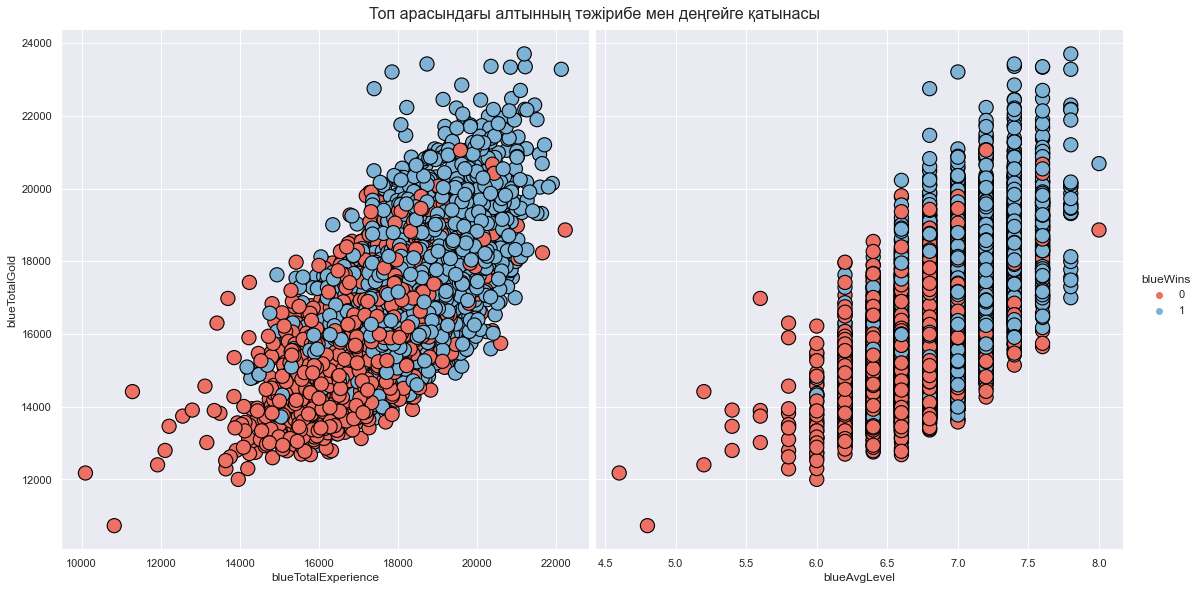

In [32]:
sns.pairplot(
    df[['blueTotalExperience', 'blueAvgLevel', 'blueTotalGold', 'blueWins']],
    x_vars=['blueTotalExperience', 'blueAvgLevel'],
    y_vars=['blueTotalGold'],
    hue='blueWins',
    palette={0: '#EC7063', 1: '#7FB3D5'},
    height=8,
    plot_kws={'edgecolor': 'black', 's': 200})

plt.suptitle('Топ арасындағы алтынның тәжірибе мен деңгейге қатынасы', y=1.02, fontsize=16)
# plt.savefig('correlation_heatmap.png')
plt.show()

Осыған дейін айтып кеткендей, алтын мен тәжірибенің арақатынасы 1:1, санына да қараса шамасы бір дәрежеде, логикасы өте оңай, криптерді я болмаса жауды өлтіргенде, объектілерді алғанда, мұнараларды құлатқанда - сіз алтын аласыз, бұл алтыннан қару-жарақ, құралдар, зелье, вард сияқты нәрселерге қол жеткізе тұрып, одан әрі мықты  боласыз. Орташа деңгей өскен сайын, сіздің күшіңіз, денсаулығыңыз, түрлі зақымдарға қарсылығыңыз артады.

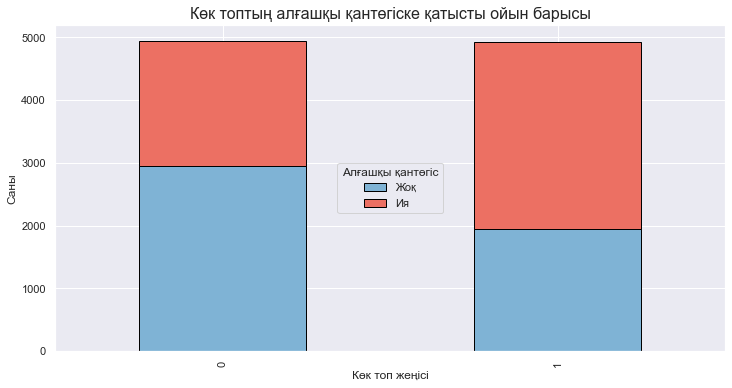

In [34]:
stacked_data = df.groupby(['blueWins', 'blueFirstBlood']).size().unstack()

stacked_data.plot(kind='bar', stacked=True, color=['#7FB3D5', '#EC7063'], figsize=(12, 6), ec = 'black')

plt.title('Көк топтың алғашқы қантөгіске қатысты ойын барысы', fontsize = 16)
plt.xlabel('Көк топ жеңісі')
plt.ylabel('Саны')
plt.legend(title='Алғашқы қантөгіс', loc='center', labels=['Жоқ', 'Ия'])
# plt.savefig('correlation_heatmap.png')
plt.show()

Алғашқы қантөгіс өз пайдасына алғанда, сіз өз жеңіске жету шамаңызды 10%-ға арттырасыз, сонда, winrate шамасы 60% құрайды.

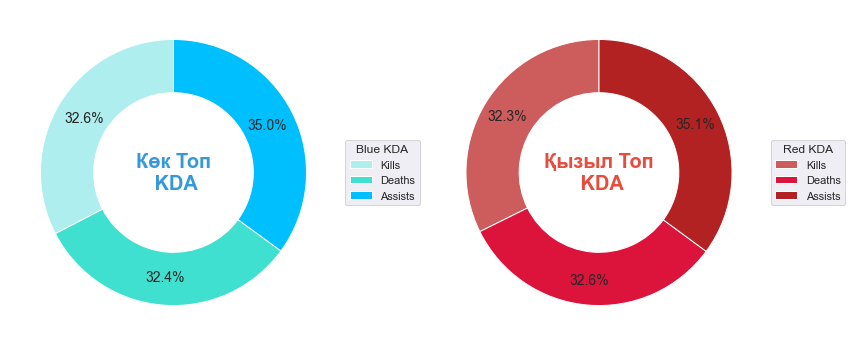

In [35]:
blue_kda = blue[['blueKills', 'blueDeaths', 'blueAssists']].sum()
red_kda = red[['redKills', 'redDeaths', 'redAssists']].sum()

blues = ['#AFEEEE', '#40E0D0', '#00BFFF']
reds = ['#CD5C5C', '#DC143C', '#B22222']

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
wedges, texts, autotexts_blue = ax1.pie(blue_kda, labels=None, autopct='%1.1f%%', 
                                        pctdistance=0.75, startangle=90, 
                                        colors=blues, 
                                        wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Көк Топ\n KDA', ha='center', va='center', fontsize=20, fontweight='bold', color='#3498db')

for autotext in autotexts_blue:
    autotext.set_position((1.05 * autotext.get_position()[0], 1.05 * autotext.get_position()[1]))
    autotext.set_fontsize(14)  # Set font size

ax1.legend(wedges, ['Kills', 'Deaths', 'Assists'], title='Blue KDA', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax2 = plt.subplot(1, 2, 2)
wedges, texts, autotexts_red = ax2.pie(red_kda, labels=None, autopct='%1.1f%%', 
                                       pctdistance=0.85, startangle=90, 
                                       colors=reds, 
                                       wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Қызыл Топ\n KDA', ha='center', va='center', fontsize=20, fontweight='bold', color='#e74c3c')

for autotext in autotexts_red:
    autotext.set_position((0.95 * autotext.get_position()[0], 0.95 * autotext.get_position()[1]))
    autotext.set_fontsize(14)  # Set font size

ax2.legend(wedges, ['Kills', 'Deaths', 'Assists'], title='Red KDA', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# plt.savefig('correlation_heatmap.png')
plt.tight_layout()
plt.show()

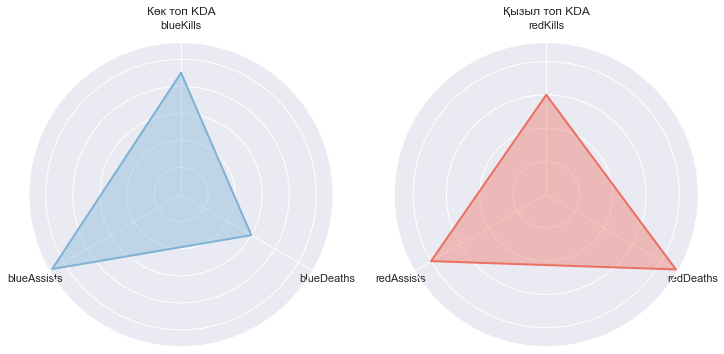

In [36]:
blue_stats = blue[['blueKills', 'blueDeaths', 'blueAssists']]

red_stats = red[['redKills', 'redDeaths', 'redAssists']]

def create_radar_chart(ax, team_stats, team_name, team_color):
    categories = list(team_stats.columns)
    num_vars = len(categories)

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    ax.set_yticklabels([])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    ax.plot(angles, team_stats.iloc[0].tolist() + team_stats.iloc[0].tolist()[:1], color=team_color, linewidth=2, linestyle='solid', label=team_name)
    ax.fill(angles, team_stats.iloc[0].tolist() + team_stats.iloc[0].tolist()[:1], color=team_color, alpha=0.4)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(polar=True))

create_radar_chart(axs[0], blue_stats, 'Blue Team', '#7FB3D5')

create_radar_chart(axs[1], red_stats, 'Red Team', '#EC7063')

axs[0].set_title('Көк топ KDA')
axs[1].set_title('Қызыл топ KDA')
plt.savefig('correlation_heatmap.png')
plt.show()

KDA ойындағы басқа ойыншылармен салыстырғанда ойыншының қуаттылығын және/немесе олардың чемпиондарымен шамамен қуат деңгейін бағалай алатын статистика бөлігі болып табылады. 

Ойынның ерекшеліктеріне қарай, кей кездері чемпион бір қабілетін төменнен жоғары қарай бағытта қолданғанда кейіпкерлер модельдері өзгеше саналады, визуалды түрде тимеген зақым ойын бойынша - тиді деп саналуы мүмкін. Сонымен қатар, чемпион таңдау кезінде көк жартысына түскен команда алғашқы таңдайды. Про-ойыншылар айтуынша, камера бұрышы «төменге» қарағанда «жоғары» жаққа қарай көріністі жақсырақ береді. Сондықтан, тимфайт кезінде төмендегі команданың көбірек килл табу мүмкіндігі бар.

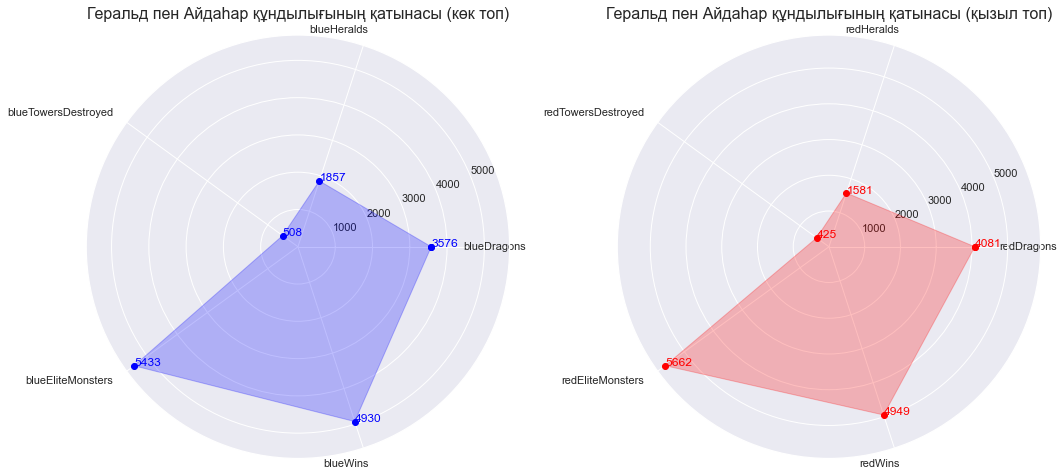

In [38]:
def plot_radar_chart(ax, categories, values, team_color, team_label):
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax.plot(angles, values + [values[0]], marker='o', label=team_label, linewidth=0, linestyle='solid', color=team_color)
    ax.fill(angles, values + [values[0]], alpha=0.25, color=team_color)

    for angle, value in zip(angles, values):
        ax.annotate(f'{value}', xy=(angle, value), xytext=(0, 0), textcoords='offset points', color=team_color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, rotation=45, ha='right')
    
blue_jungle_stats = df[['blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueEliteMonsters', 'blueWins']]
sum_stats_blue = blue_jungle_stats.sum()

categories_blue = list(sum_stats_blue.index)

plt.figure(figsize=(15, 15))
ax1 = plt.subplot(121, polar=True)
plot_radar_chart(ax1, categories_blue, sum_stats_blue.tolist(), 'blue', 'Blue Team')
plt.title('Геральд пен Айдаһар құндылығының қатынасы (көк топ)', fontsize = 16)

red_jungle_stats = df[['redDragons', 'redHeralds', 'redTowersDestroyed', 'redEliteMonsters', 'redWins']]
sum_stats_red = red_jungle_stats.sum()

categories_red = list(sum_stats_red.index)

ax2 = plt.subplot(122, polar=True)
plot_radar_chart(ax2, categories_red, sum_stats_red.tolist(), 'red', 'Red Team')
plt.title('Геральд пен Айдаһар құндылығының қатынасы (қызыл топ)', fontsize = 16)
# plt.savefig('correlation_heatmap.png')
plt.tight_layout()
plt.show()

Осы графиктен біз нақты ойыншылар арасында Айдаһар құндылығы Геральдқа қарағанда 2 есе артық екенін екі командаға да растаймыз, сонымен қатар, қызыл одақ көкпен салыстырғанда 500-ге жуық артық айдаһар алады, бірақ 300-дей Геральдты беріп қояды (географиялық орналасуынан). Көбіне Геральдпен шамамен 1/3 жағдайда ғана жау мұнарасы құлайды. Әрине алынған объектілердің саны мен жеңіске жету арасында корреляция бар және ол оң болып саналады.

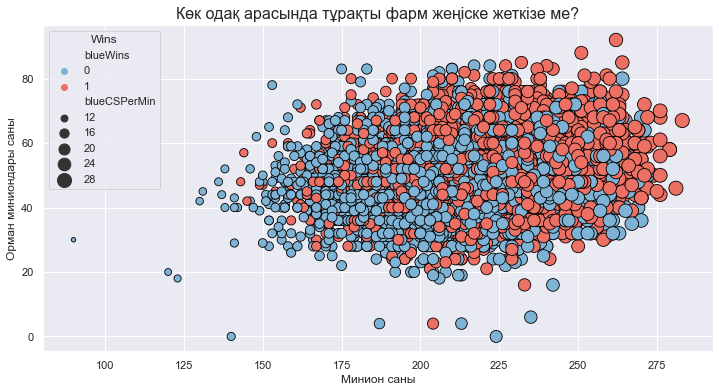

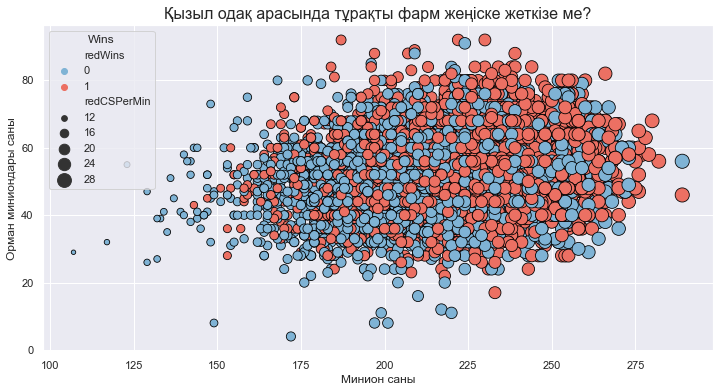

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='blueTotalMinionsKilled', y='blueTotalJungleMinionsKilled', size='blueCSPerMin', 
                data=blue, hue='blueWins', palette=['#7FB3D5', '#EC7063'], sizes=(20, 200), marker='o',
                ec = 'black')
plt.title('Көк одақ арасында тұрақты фарм жеңіске жеткізе ме?', fontsize = 16)
plt.xlabel('Минион саны')
plt.ylabel('Орман миниондары саны')
plt.legend(title='Wins', loc='upper left')
plt.savefig('correlation_heatmap.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='redTotalMinionsKilled', y='redTotalJungleMinionsKilled', size='redCSPerMin', 
                data=red, hue='redWins', palette=['#7FB3D5', '#EC7063'], sizes=(20, 200), marker='o',
                ec = 'black')
plt.title('Қызыл одақ арасында тұрақты фарм жеңіске жеткізе ме?', fontsize = 16)
plt.xlabel('Минион саны')
plt.ylabel('Орман миниондары саны')
plt.legend(title='Wins', loc='upper left')
# plt.savefig('correlation_heatmap.png')
plt.show()

Көріп тұрғанымыздай, 10 минутта жоғарғы elo-ға фарм жеңіске жету үшін өте маңызды, орман мен жолақтағы чемпиондарда cs үлкен боса, олардың басымдылығы да сондай болады және де ойында миниондар ағымын дұрыс басқару, жауға фарм бермеу, оның минион ағымын мұнараға ағыту, ағымды керек кезде тоқтату - оны ойыннан шығарумен тең. Еш қару-жарағы жок, төмен деңгейлі кейіпкер ойын нәтижесіне әсер етуі - шамалы. Сондықтан, ойын барысында, басымдылық бар ма, жоқ па мейлі, тұрақты фарм - __comeback__ негізі.

<Figure size 1080x720 with 0 Axes>

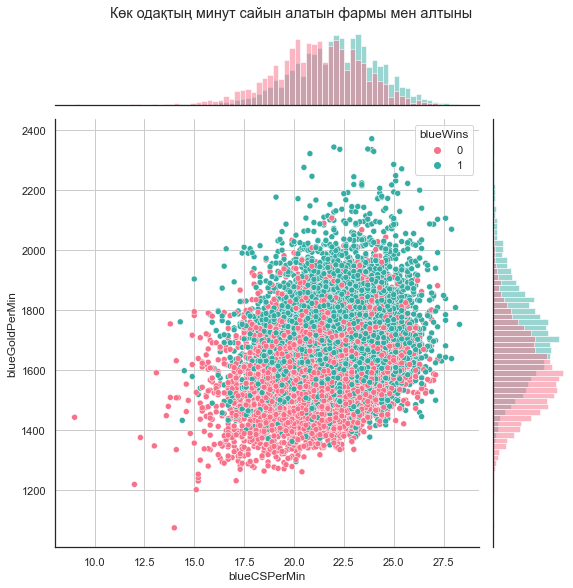

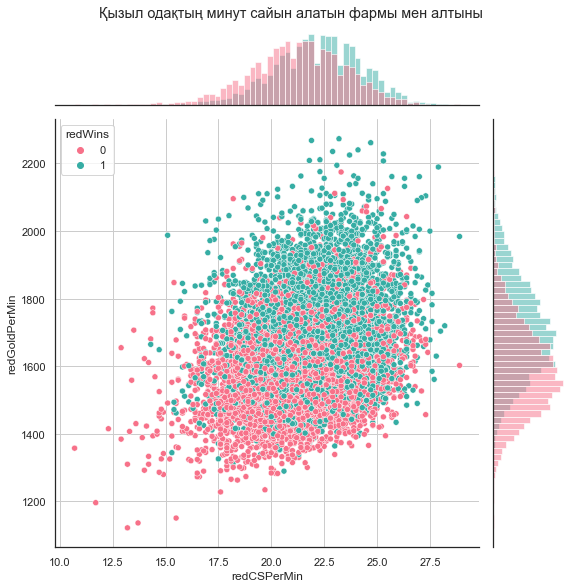

In [42]:
blue_data = blue[['blueCSPerMin', 'blueGoldPerMin', 'blueWins']]

sns.set_theme(style="darkgrid")

plt.figure(figsize=(15, 10))
sns.set(style="white", color_codes=True)

g = sns.JointGrid(x='blueCSPerMin', y='blueGoldPerMin', data=blue_data, hue='blueWins', height=8, palette='husl')
g = g.plot(sns.scatterplot, sns.histplot)
plt.savefig('correlation_heatmap.png')

g.fig.suptitle('Көк одақтың минут сайын алатын фармы мен алтыны', y=1.02)

red_data = red[['redCSPerMin', 'redGoldPerMin', 'redWins']]

g2 = sns.JointGrid(x='redCSPerMin', y='redGoldPerMin', data=red_data, hue='redWins', height=8, palette='husl')
g2 = g2.plot(sns.scatterplot, sns.histplot, color='red')

g2.fig.suptitle('Қызыл одақтың минут сайын алатын фармы мен алтыны', y=1.02)

g2.ax_joint.grid(True)
g.ax_joint.grid(True)

plt.show();

Егер сіздің фарм нашар болса, тіпті кішігірім табыстар ойын барысына үлкен әсер етеді.

Қолданылған қосымша деректер:

https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min/code

https://www.kaggle.com/code/khangah/lol-analysis-prediction-from-the-first-10-mins

https://www.kaggle.com/code/mathewvondersaar/throw-lane-throw-game-leauge-anylysis

https://www.kaggle.com/code/servietsky/league-of-legends-what-to-do-in-first-10-min


https://www.kaggle.com/code/jeremyarancio/which-decisions-before-10min-lead-to-win

https://www.leagueoflegends.com/ru-ru/how-to-play/